In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pprint


In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
Base = automap_base()

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17017b4df48>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

# Exploratory Climate Analysis

In [12]:
# Calculate the date 1 year ago from the last data point in the database
last_day = session.query(Measurement).order_by(Measurement.date.desc()).first().date
last_day


'2017-08-23'

In [13]:
last_12months=dt.datetime.strptime(last_day, '%Y-%m-%d') - dt.timedelta(days=365)
last_12months


datetime.datetime(2016, 8, 23, 0, 0)

In [14]:
# Perform a query to retrieve the data and precipitation scores
precip_date_query=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >last_12months).order_by(Measurement.date).all()
precip_date_query


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [15]:

# Save the query results as a Pandas DataFrame and set the index to the date column
precp_date_df=pd.DataFrame(precip_date_query,columns=["Date","Precipitation"])
precp_date_df.sort_values(by=['Date'], ascending=False)
precp_date_df.set_index('Date',inplace=True)
precp_date_df = precp_date_df[precp_date_df['Precipitation'].notna()]

precp_date_df


,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


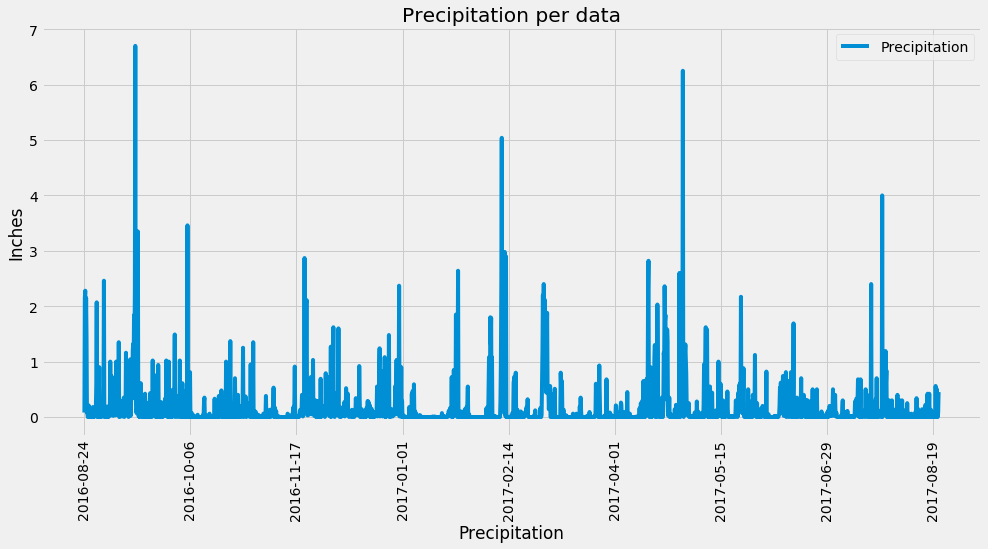

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precp_date_df.plot(title="Precipitation per data",rot=90,figsize=(15, 7))

plt.xlabel("Precipitation")
plt.ylabel("Inches")
plt.tight_layout
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measuerment_sumary=precp_date_df["Precipitation"].describe()
measuerment_sumary


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [18]:
measuerment_first_row = session.query(Measurement).first()
measuerment_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17017dda408>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [19]:
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17017b4df48>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [20]:
# Design a query to show how many stations are available in this dataset?
number_of_stations=session.query(Station.station, func.count(Station.station)).group_by(Station.station).count()
number_of_stations

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
list_of_stations=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
list_of_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
highest_number_of_observation=session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
highest_number_of_observation

('USC00519281')

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_day=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_day

'2017-08-23'

In [24]:
date_before_12months=dt.datetime.strptime(last_day,"%Y-%m-%d")- dt.timedelta(days=365)
date_before_12months

datetime.datetime(2016, 8, 23, 0, 0)

In [25]:
# highest temperature recorded
max_tobs_query=session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').all()
max_tobs_query

[('USC00519281', 83.0)]

In [26]:
#lowest temperature
min_tobs_query=session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').all()
min_tobs_query

[('USC00519281', 59.0)]

In [27]:
#average temperature
avg_tobs_query=session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').all()
avg_tobs_query

[('USC00519281', 73.0968660968661)]

In [28]:
date_tobs_query=session.query(Measurement.tobs).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').order_by(Measurement.tobs.desc()).all()
date_tobs_query

[(83.0),
 (82.0),
 (82.0),
 (82.0),
 (81.0),
 (81.0),
 (81.0),
 (81.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 

In [29]:
temp_df=pd.DataFrame(date_tobs_query,columns=["tobs"])
temp_df.head()

,tobs
0,83.0
1,82.0
2,82.0
3,82.0
4,81.0


Text(0.5, 0, 'Temperature')

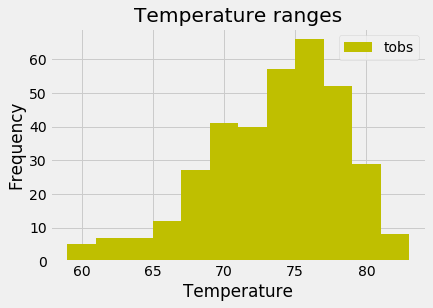

In [30]:
temp_df.plot.hist(density=False,bins=12,color='y',title="Temperature ranges")
plt.xlabel("Temperature")

## Bonus Challenge Assignment

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [73]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps("2017-08-01","2017-08-14"))




[(71.0, 79.01785714285714, 84.0)]


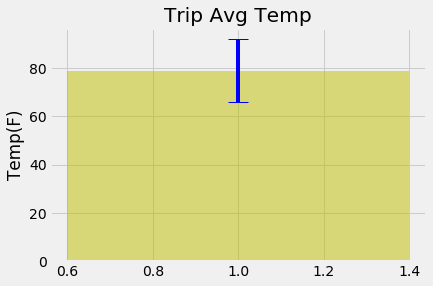

In [215]:
# Plot the results from your previous query as a bar chart. 
my_trip=list(calc_temps("2017-08-01","2017-08-14"))
length_my_trip=len(calc_temps("2017-08-01","2017-08-14"))
high_avg=[my_trip[0][1]]
y_error=[my_trip[0][2]-my_trip[0][0]]
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(length_my_trip, high_avg, yerr=y_error, alpha=0.5, ecolor='b', capsize=10,color="y")
plt.title('Trip Avg Temp')
plt.ylabel("Temp(F)")

plt.show()

In [204]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
start=dt.date(2017,8,1)
end=dt.date(2017,8,14)

rainfall=session.query(func.count(Measurement.prcp)).filter(Measurement.date >=start).filter(Measurement.date <= end).first()
rainfall


(50)

In [211]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
column_name = [Measurement.prcp, Station.station, Station.name,Station.latitude, Station.longitude, Station.elevation]
station_data = session.query(*column_name).filter(Measurement.station == Station.station).filter(Measurement.date >=start).filter(Measurement.date <= end).order_by(Measurement.prcp.desc()).all()
for record in station_data:

    (m_prcp,s_station,s_name,s_lat,s_long,s_elevation) = record
    print(f"'precip' {m_prcp} 'station' {s_station} 'name' {s_name} 'lat' {s_lat} 'long' {s_long} 'elevation' {s_elevation}")


'precip' 0.34 'station' USC00516128 'name' MANOA LYON ARBO 785.2, HI US 'lat' 21.3331 'long' -157.8025 'elevation' 152.4
'precip' 0.25 'station' USC00516128 'name' MANOA LYON ARBO 785.2, HI US 'lat' 21.3331 'long' -157.8025 'elevation' 152.4
'precip' 0.22 'station' USC00516128 'name' MANOA LYON ARBO 785.2, HI US 'lat' 21.3331 'long' -157.8025 'elevation' 152.4
'precip' 0.15 'station' USC00516128 'name' MANOA LYON ARBO 785.2, HI US 'lat' 21.3331 'long' -157.8025 'elevation' 152.4
'precip' 0.14 'station' USC00516128 'name' MANOA LYON ARBO 785.2, HI US 'lat' 21.3331 'long' -157.8025 'elevation' 152.4
'precip' 0.12 'station' USC00514830 'name' KUALOA RANCH HEADQUARTERS 886.9, HI US 'lat' 21.5213 'long' -157.8374 'elevation' 7.0
'precip' 0.1 'station' USC00514830 'name' KUALOA RANCH HEADQUARTERS 886.9, HI US 'lat' 21.5213 'long' -157.8374 'elevation' 7.0
'precip' 0.08 'station' USC00519523 'name' WAIMANALO EXPERIMENTAL FARM, HI US 'lat' 21.33556 'long' -157.71139 'elevation' 19.5
'precip' 0

In [164]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).first()
    
daily_normals("01-01")

(62.0, 69.15384615384616, 77.0)

In [169]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]
# Set the start and end date of the trip
start=dt.date(2017,8,1)
end=dt.date(2017,8,14)
# Use the start and end date to create a range of dates
numdays=14
date_list = [start + dt.timedelta(days=x) for x in range(numdays)]
# Stip off the year and save a list of %m-%d strings
date_string=[date.strftime("%m-%d") for date in date_list]

# Loop through the list of %m-%d strings and calculate the normals for each date

normals=[tuple([date])+daily_normals(date) for date in date_string]
normals

[('08-01', 67.0, 75.54, 83.0),
 ('08-02', 68.0, 75.60377358490567, 84.0),
 ('08-03', 70.0, 76.61111111111111, 85.0),
 ('08-04', 69.0, 76.71153846153847, 84.0),
 ('08-05', 69.0, 76.14814814814815, 82.0),
 ('08-06', 67.0, 76.25, 83.0),
 ('08-07', 71.0, 77.15686274509804, 83.0),
 ('08-08', 68.0, 76.5576923076923, 83.0),
 ('08-09', 69.0, 75.98039215686275, 81.0),
 ('08-10', 65.0, 76.42, 83.0),
 ('08-11', 67.0, 75.98113207547169, 82.0),
 ('08-12', 67.0, 76.52727272727273, 83.0),
 ('08-13', 71.0, 76.98245614035088, 84.0),
 ('08-14', 71.0, 76.77777777777777, 82.0)]

In [180]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_temp_df = pd.DataFrame(normals, columns=['trip_dates', 'TMin', 'TAvg','TMax'])
trip_temp_df.set_index("trip_dates",inplace=True)
trip_temp_df

,TMin,TAvg,TMax
trip_dates,,,
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0
08-08,68.0,76.557692,83.0
08-09,69.0,75.980392,81.0


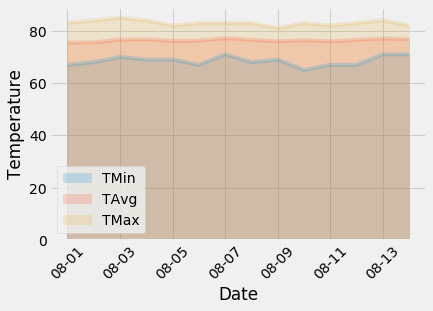

In [192]:
# Plot the daily normals as an area plot with `stacked=False`
trip_temp_df.plot.area(stacked=False,rot=45,alpha=0.2)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.show()